In [1]:
import numpy as np
import matplotlib.pyplot as plt

from planner import *
from prob_rss import get_prob

np.random.seed(4)
prob = get_prob()
cas_pol = plan_mission(prob)

uav_pol = plan_exploration(prob, cas_pol)

finished after 0.03s and 20 iterations
finished after 0.01s and 3 iterations


success probability: 0.906000018119812


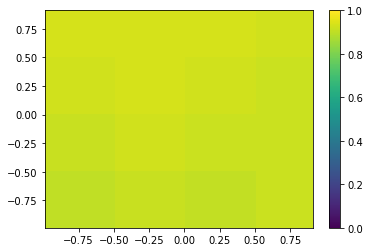

In [2]:
plot_value_cassie(cas_pol, prob)

success value: 0.0


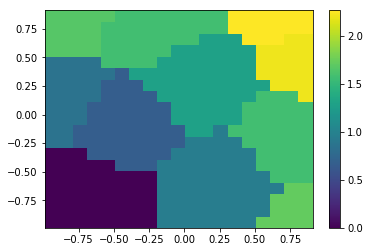

In [3]:
plot_value_uav(uav_pol, get_prob())